# **Problem Statement**
##Goal 
Clustering neighbourhood and gain insight about collisions cases 

##Research question 
Which area has a significant contribution to collision cases in Toronto in 2006 - 2020?

# **Assumption and Data**
##Assumption 
There are some areas that have a frequency of accidents more often than other areas, therefore, this study is to find out these areas.

##Data
This dataset includes all traffic collisions events where a person was either Killed or Seriously Injured (KSI) from 2006 – 2020. This study utilized data from [Toronto Police Official Website](https://data.torontopolice.on.ca/datasets/TorontoPS::ksi/explore?location=43.722757%2C-79.382143%2C11.43). 

# **Analysis - Modeling**

## Data Preparation

In [1]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
%matplotlib inline

#Model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import davies_bouldin_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Import Dataset
df = pd.read_csv('/content/drive/MyDrive/KSI.csv')
pd.set_option("display.max_columns", None)
df.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.452490,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.452490,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,65 to 69,Fatal,<Null>,North,Other,<Null>,<Null>,<Null>,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Unknown,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,Major Arterial,Scarborough,25,42,43.801943,-79.199786,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Motorcycle Driver,45 to 49,Fatal,<Null>,East,Motorcycle,Turning Right,Disobeyed Traffic Control,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,Major Arterial,Scarborough,25,42,43.801943,-79.199786,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Turning Movement,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Going Ahead,Driving Properly,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,<Null>,Major Arterial,Scarborough,"21,20",41,43.734945,-79.256190,Mid-Block,<Null>,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Driver,25 to 29,None,<Null>,West,"Automobile, Station Wagon",Going Ahead,Other,"Ability Impaired, Alcohol",<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5


##Data Understanding

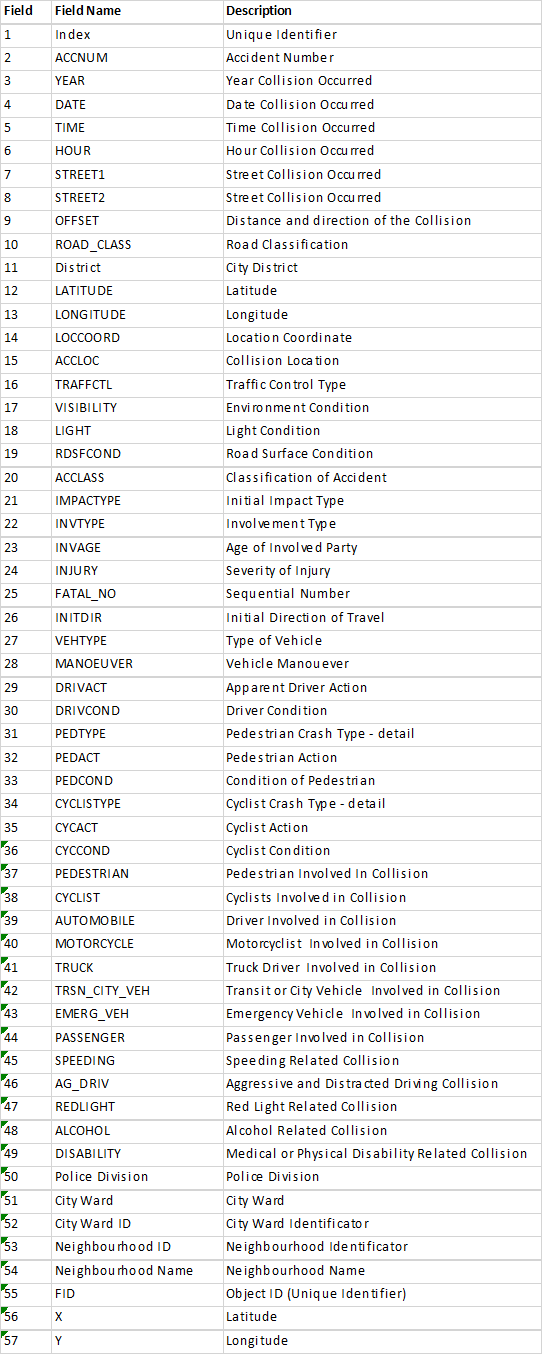

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                16860 non-null  float64
 1   Y                16860 non-null  float64
 2   INDEX_           16860 non-null  int64  
 3   ACCNUM           16860 non-null  int64  
 4   YEAR             16860 non-null  int64  
 5   DATE             16860 non-null  object 
 6   TIME             16860 non-null  int64  
 7   HOUR             16860 non-null  int64  
 8   STREET1          16860 non-null  object 
 9   STREET2          16860 non-null  object 
 10  OFFSET           16860 non-null  object 
 11  ROAD_CLASS       16860 non-null  object 
 12  DISTRICT         16860 non-null  object 
 13  WARDNUM          16860 non-null  object 
 14  DIVISION         16860 non-null  object 
 15  LATITUDE         16860 non-null  float64
 16  LONGITUDE        16860 non-null  float64
 17  LOCCOORD    

##Checking Data

In [6]:
#Checking missing value
df.isna().sum()

X                  0
Y                  0
INDEX_             0
ACCNUM             0
YEAR               0
DATE               0
TIME               0
HOUR               0
STREET1            0
STREET2            0
OFFSET             0
ROAD_CLASS         0
DISTRICT           0
WARDNUM            0
DIVISION           0
LATITUDE           0
LONGITUDE          0
LOCCOORD           0
ACCLOC             0
TRAFFCTL           0
VISIBILITY         0
LIGHT              0
RDSFCOND           0
ACCLASS            0
IMPACTYPE          0
INVTYPE            0
INVAGE             0
INJURY             0
FATAL_NO           0
INITDIR            0
VEHTYPE            0
MANOEUVER          0
DRIVACT            0
DRIVCOND           0
PEDTYPE            0
PEDACT             0
PEDCOND            0
CYCLISTYPE         0
CYCACT             0
CYCCOND            0
PEDESTRIAN         0
CYCLIST            0
AUTOMOBILE         0
MOTORCYCLE         0
TRUCK              0
TRSN_CITY_VEH      0
EMERG_VEH          0
PASSENGER    

In [7]:
#Check duplicated data
df.duplicated().sum()

0

In [8]:
missingdf = (df == '<Null>').values.any(axis = 1) | (df == 'Unknown').values.any(axis = 1) | (df == 'unknown').values.any(axis = 1)

In [9]:
df[missingdf].head(2)

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.45249,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.45249,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,65 to 69,Fatal,<Null>,North,Other,<Null>,<Null>,<Null>,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Unknown,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2


It looks like all features have a `missingdf` value, so we keep the table as it is.

This analysis is to find out which areas have contributed a lot to the collision case in Toronto in 2006 - 2020. Therefore, we will only use a few related variables.

**The features we don't use are following below:**

*   `X`, `Y`, `LATITUDE`, `LONGITUDE` : Feature that show geography location, since this analysis doesn't provide geographic analysis
*   `INDEX_`, `ObjectId`, `WARDNUM`,`DIVISION`, `HOOD_ID`: Identifier
*   `TIME`, `HOUR`: We prefer `DATE` for time feature in this analysis
*   `STREET1`, `STREET2`, `LOCCOORD`, `ACCLOC`: This is detail where collisions case happens, still have much `Null` values. We prefer `DISTRIC` and `NEIGHBOURHOOD` as places features analysis
*   Feature that dominated with `Null` values & `Unknown` values : `OFFSET`, `INVAGE`, `INJURY`, `FATAL_NO`, `VEHTYPE`, `MANOEUVER`, `DRIVACT`, `DRIVCOND`, `PEDTYPE`, `PEDACT`, `PEDCOND`, `CYCLISTYPE`, `CYCACT`, `CYCCOND`, `PEDESTRIAN`, `CYCLIST`, `AUTOMOBILE`, `MOTORCYCLE`, `TRUCK`,	`TRSN_CITY_VEH`,	`EMERG_VEH`,	`PASSENGER`,`SPEEDING`,	`AG_DRIV`,	`REDLIGHT`,	`ALCOHOL`,	`DISABILITY`
*   `POLICE_DIVISION`: Police division identifier
*   `INITDIR`: We are not using points of the compass as feature

## Exploratory Data Analysis

In [10]:
df1 = df.copy() #Just to make sure I didn't do something irreversible

In [11]:
df1.VISIBILITY.value_counts()

Clear                     14476
Rain                       1819
Snow                        332
Other                        99
Fog, Mist, Smoke, Dust       46
Freezing Rain                43
Drifting Snow                19
<Null>                       18
Strong wind                   8
Name: VISIBILITY, dtype: int64

In [12]:
df1 = df1[['ACCNUM','YEAR', 'DATE', 'ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'NEIGHBOURHOOD']]
df1

,ACCNUM,YEAR,DATE,ROAD_CLASS,DISTRICT,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,NEIGHBOURHOOD
0,892658,2006,2006/03/11 05:00:00+00,Major Arterial,Toronto and East York,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Driver,High Park North (88)
1,892658,2006,2006/03/11 05:00:00+00,Major Arterial,Toronto and East York,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Pedestrian,High Park North (88)
2,892810,2006,2006/03/11 05:00:00+00,Major Arterial,Scarborough,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Motorcycle Driver,Rouge (131)
3,892810,2006,2006/03/11 05:00:00+00,Major Arterial,Scarborough,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Driver,Rouge (131)
4,892682,2006,2006/03/12 05:00:00+00,Major Arterial,Scarborough,No Control,Clear,Dark,Dry,Pedestrian Collisions,Driver,Eglinton East (138)
...,...,...,...,...,...,...,...,...,...,...,...,...
16855,1636966,2020,2020/08/30 04:00:00+00,<Null>,<Null>,No Control,Clear,Daylight,Dry,Cyclist Collisions,Cyclist,Cliffcrest (123)
16856,1650701,2020,2020/09/01 04:00:00+00,Major Arterial,Scarborough,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Driver,Eglinton East (138)
16857,1650701,2020,2020/09/01 04:00:00+00,Major Arterial,Scarborough,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Driver,Eglinton East (138)
16858,1650701,2020,2020/09/01 04:00:00+00,Major Arterial,Scarborough,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Passenger,Eglinton East (138)


`ACCNUM` is a registered accident number which records one collision case per number. So if there are 5 person involved in the case, the `ACCNUM` number has get duplicated by five, which will be discarded as this analysis only looks at the count per case.

In [13]:
df1 = df1.drop_duplicates(subset=['ACCNUM']) # We need unique value to count collision case
df1

,ACCNUM,YEAR,DATE,ROAD_CLASS,DISTRICT,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,NEIGHBOURHOOD
0,892658,2006,2006/03/11 05:00:00+00,Major Arterial,Toronto and East York,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Driver,High Park North (88)
2,892810,2006,2006/03/11 05:00:00+00,Major Arterial,Scarborough,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Motorcycle Driver,Rouge (131)
4,892682,2006,2006/03/12 05:00:00+00,Major Arterial,Scarborough,No Control,Clear,Dark,Dry,Pedestrian Collisions,Driver,Eglinton East (138)
7,892913,2006,2006/03/12 05:00:00+00,Major Arterial,Toronto and East York,Traffic Signal,Clear,Dark,Dry,Pedestrian Collisions,Driver,Trinity-Bellwoods (81)
9,893251,2006,2006/03/15 05:00:00+00,Major Arterial,Etobicoke York,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Driver,Kingsview Village-The Westway (6)
...,...,...,...,...,...,...,...,...,...,...,...,...
16848,1603307,2020,2020/08/25 04:00:00+00,<Null>,<Null>,No Control,Clear,Daylight,Dry,Cyclist Collisions,Cyclist,North St.James Town (74)
16850,1604895,2020,2020/08/25 04:00:00+00,<Null>,<Null>,No Control,Clear,"Dark, artificial",Dry,Rear End,Motorcycle Driver,South Riverdale (70)
16852,1630486,2020,2020/08/29 04:00:00+00,Major Arterial,North York,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Driver,Willowdale East (51)
16854,1636966,2020,2020/08/30 04:00:00+00,<Null>,<Null>,No Control,Clear,Daylight,Dry,Cyclist Collisions,Driver,Cliffcrest (123)


Only 6002 unique collisions case numbers which recorded between 2006 - 2020 in Toronto

###Exploring Cases by YEAR

In [14]:
year = df1.groupby(['YEAR'])['ACCNUM'].count().to_frame().reset_index()
year

,YEAR,ACCNUM
0,2006,481
1,2007,453
2,2008,417
3,2009,438
4,2010,400
5,2011,399
6,2012,453
7,2013,431
8,2014,350
9,2015,350


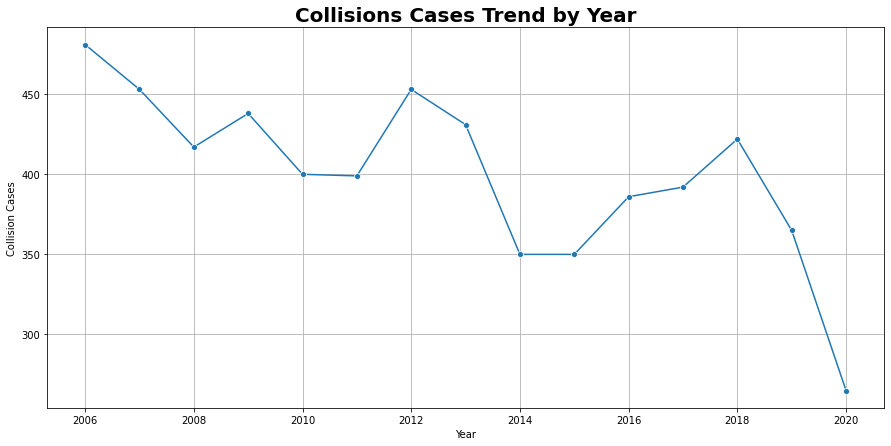

In [15]:
fig, ax = plt.subplots(figsize=(15,7))

sns.lineplot(data=year, x='YEAR', y='ACCNUM', marker='o')
ax.set_title('Collisions Cases Trend by Year', fontsize=20, fontweight='bold')
ax.set_ylabel('Collision Cases')
ax.set_xlabel('Year')
ax.grid(True)

This is a good trend when viewed from the last 3 years the number of collision cases in Toronto has decreased significantly. It is also possible that this downward trend has something to do with the covid case which was at its peak at that time.

###Exploring Cases by MONTH

In [16]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df1['MONTH'] = df1.DATE.dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
import calendar
df1['MONTH'] = df1['MONTH'].apply(lambda x: calendar.month_abbr[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [20]:
accnum = df1.drop_duplicates(subset=['ACCNUM']) # We need unique value to count collision case
month = accnum.groupby(['MONTH'])['ACCNUM'].count().to_frame().sort_values('MONTH', key = lambda x : x.apply(lambda x : month_dict[x])).reset_index()
month 

,MONTH,ACCNUM
0,Jan,429
1,Feb,363
2,Mar,409
3,Apr,403
4,May,488
5,Jun,597
6,Jul,533
7,Aug,587
8,Sep,610
9,Oct,585


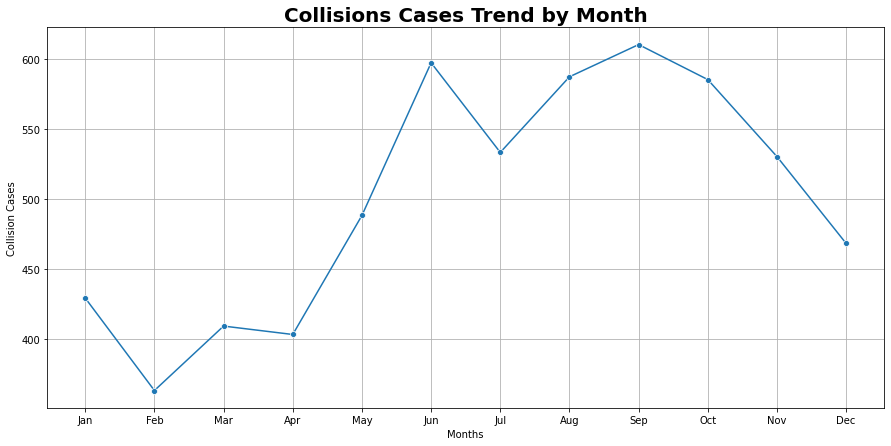

In [21]:
fig, ax = plt.subplots(figsize=(15,7))

sns.lineplot(data=month, x='MONTH', y='ACCNUM', marker = 'o')
ax.set_title('Collisions Cases Trend by Month', fontsize=20, fontweight='bold')
ax.set_ylabel('Collision Cases')
ax.set_xlabel('Months')
ax.grid(True)

`Jan - Apr` collision cases tend to be low, then `Apr - Sep` the trend starts to increase even though in `July` it had decreased. From `Sep - Dec` the trend started down again. This is a bit difficult to understand without understanding the traffic conditions that exist in Toronto.

###Exploring Cases by ROAD_CLASS

In [22]:
df1.ROAD_CLASS.value_counts()

Major Arterial         4142
Minor Arterial          982
Collector               369
Local                   307
<Null>                  164
Expressway               19
Other                     9
Laneway                   4
Pending                   3
Expressway Ramp           2
Major Arterial Ramp       1
Name: ROAD_CLASS, dtype: int64

For facilitate of analysis, `Null` values ​​will be replaced with `Major Arterial` while `Laneway`, `Pending`, `Expressway Ramp` and `Major Arterial Ramp` features will be combined with `Other` features.

In [23]:
df1['ROAD_CLASS'] = df1['ROAD_CLASS'].replace('<Null>', 'Major Arterial')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
road_col = ['Laneway', 'Pending', 'Expressway', 'Expressway Ramp', 'Major Arterial Ramp']
df1['ROAD_CLASS'] = df1['ROAD_CLASS'].replace(road_col, 'Other')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df1.ROAD_CLASS.value_counts()

Major Arterial    4306
Minor Arterial     982
Collector          369
Local              307
Other               38
Name: ROAD_CLASS, dtype: int64

In [26]:
road = df1.groupby(['ROAD_CLASS'])['ACCNUM'].count().to_frame()
road = road.sort_values('ACCNUM', ascending=False).reset_index()
road

,ROAD_CLASS,ACCNUM
0,Major Arterial,4306
1,Minor Arterial,982
2,Collector,369
3,Local,307
4,Other,38


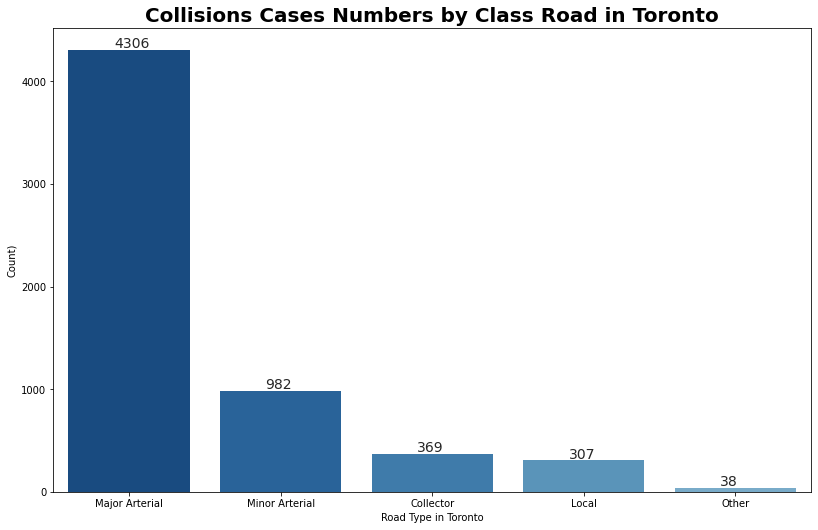

In [27]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data=road, x='ROAD_CLASS', y='ACCNUM', palette=sns.color_palette("Blues_r",9))
ax.set_title('Collisions Cases Numbers by Class Road in Toronto', fontsize=20, fontweight='bold')
ax.set_xlabel('Road Type in Toronto')
ax.set_ylabel('Count)')
sns.set_style("whitegrid")

x = np.arange(len(road['ROAD_CLASS']))
y = road['ACCNUM']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+20, str(v), fontsize = 14)

plt.tight_layout(pad=3.0)

Most collisions cases happens in Mahor Arterial as the main road in Toronto. An explanation of each class of road can be found at [official site Toronto](https://www.toronto.ca/services-payments/streets-parking-transportation/traffic-management/road-classification-system/about-the-road-classification-system/)

### Exploring Cases  by DISTRICT

In [28]:
df1.DISTRICT.value_counts()

Toronto and East York    2032
Etobicoke York           1373
Scarborough              1317
North York               1185
<Null>                     62
Toronto East York          33
Name: DISTRICT, dtype: int64

In [29]:
df1['DISTRICT'] = df1['DISTRICT'].replace('Toronto East York', 'Toronto and East York')
df1['DISTRICT'] = df1['DISTRICT'].replace('<Null>', 'Toronto and East York')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
df1.DISTRICT.value_counts()

Toronto and East York    2127
Etobicoke York           1373
Scarborough              1317
North York               1185
Name: DISTRICT, dtype: int64

In [31]:
dis = df1.groupby(['DISTRICT'])['ACCNUM'].count().to_frame()
dis = dis.sort_values('ACCNUM', ascending=False).reset_index()
dis

,DISTRICT,ACCNUM
0,Toronto and East York,2127
1,Etobicoke York,1373
2,Scarborough,1317
3,North York,1185


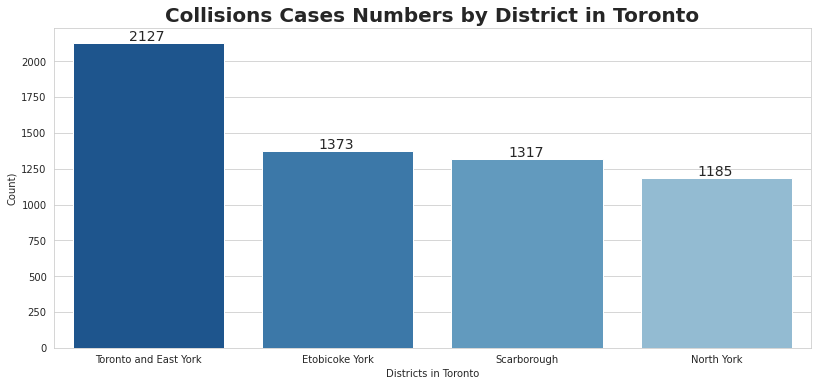

In [32]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=dis, x='DISTRICT', y='ACCNUM', palette=sns.color_palette("Blues_r",6), order = dis['DISTRICT'].value_counts().index)
ax.set_title('Collisions Cases Numbers by District in Toronto', fontsize=20, fontweight='bold')
ax.set_xlabel('Districts in Toronto')
ax.set_ylabel('Count)')
sns.set_style("whitegrid")

x = np.arange(len(dis['DISTRICT']))
y = dis['ACCNUM']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+20, str(v), fontsize = 14)

plt.tight_layout(pad=3.0)

###Exploring Cases by TRAFFCTL

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

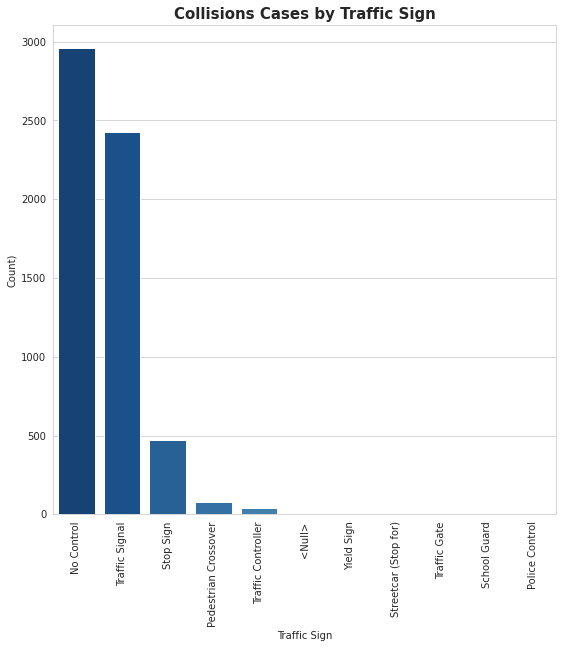

In [33]:
fig, ax=plt.subplots(figsize=(9,9))

sns.countplot(df1.TRAFFCTL, palette=sns.color_palette("Blues_r",15), order = df1['TRAFFCTL'].value_counts().index)
ax.set_title('Collisions Cases by Traffic Sign', fontsize=15, fontweight='bold')
ax.set_xlabel('Traffic Sign')
ax.set_ylabel('Count)')
sns.set_style("whitegrid")
plt.xticks(rotation = 90)

Most collisions cases happens when there is no traffic control nor there are traffic signal such traffic lamp. 

###Exploring Cases by VISIBILITY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


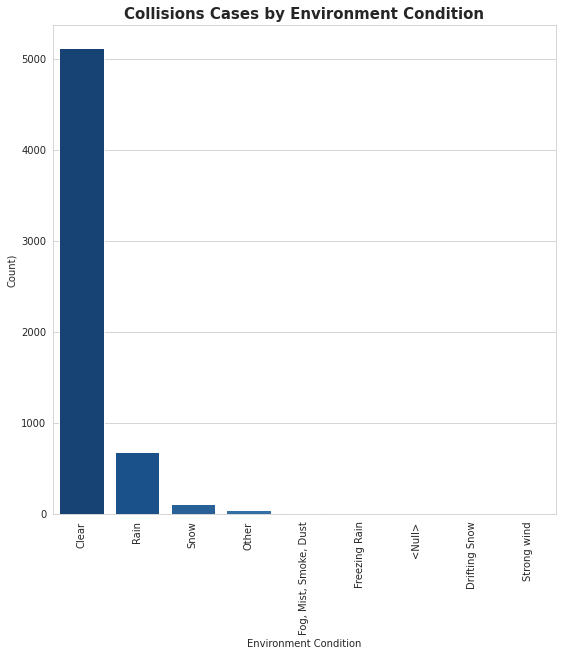

In [34]:
fig, ax=plt.subplots(figsize=(9,9))

sns.countplot(df1.VISIBILITY, palette=sns.color_palette("Blues_r",15), order = df1['VISIBILITY'].value_counts().index)
ax.set_title('Collisions Cases by Environment Condition', fontsize=15, fontweight='bold')
plt.xticks(rotation = 90)
ax.set_xlabel('Environment Condition')
ax.set_ylabel('Count)')
sns.set_style("whitegrid")

Surprisingly, clear conditions are the most common environmental conditions in collision cases. It can be concluded that environmental conditions are not a major factor in collision cases.

###Exploring Cases by LIGHT

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


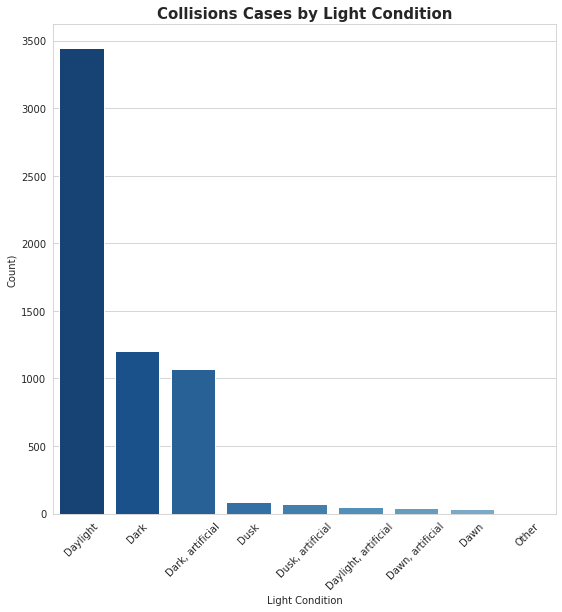

In [35]:
fig, ax=plt.subplots(figsize=(9,9))

sns.countplot(df1.LIGHT, palette=sns.color_palette("Blues_r",15), order = df1['LIGHT'].value_counts().index)
ax.set_title('Collisions Cases by Light Condition', fontsize=15, fontweight='bold')
plt.xticks(rotation = 45)
ax.set_xlabel('Light Condition')
ax.set_ylabel('Count)')
sns.set_style("whitegrid")

Similar to environmental conditions, light conditions are not a significant factor in the case of collisions as we see during the day it is a condition where many accidents occur.

###Exploring Cases by RDSFCOND

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

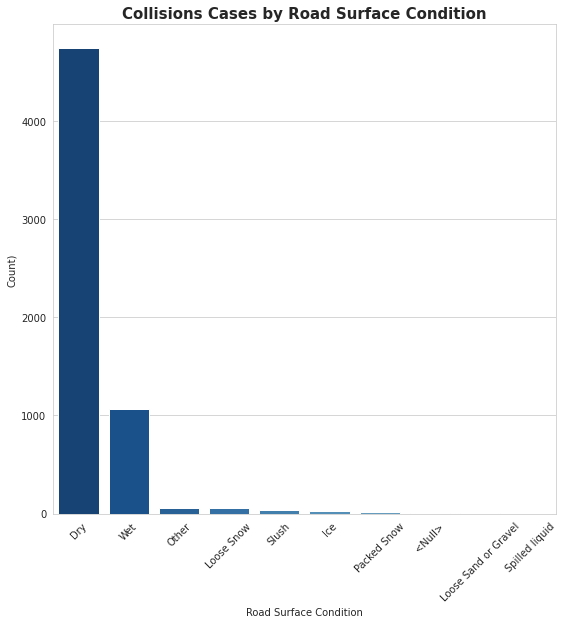

In [36]:
fig, ax=plt.subplots(figsize=(9,9))

sns.countplot(df1.RDSFCOND, palette=sns.color_palette("Blues_r",15), order = df1['RDSFCOND'].value_counts().index)
ax.set_title('Collisions Cases by Road Surface Condition', fontsize=15, fontweight='bold')
ax.set_xlabel('Road Surface Condition')
ax.set_ylabel('Count)')
sns.set_style("whitegrid")
plt.xticks(rotation = 45)

Road surfaces in dry conditions make up the majority of accidents that occur. It can be concluded that the environment when the collision case is fine.

###Exploring Cases by IMPACTYPE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

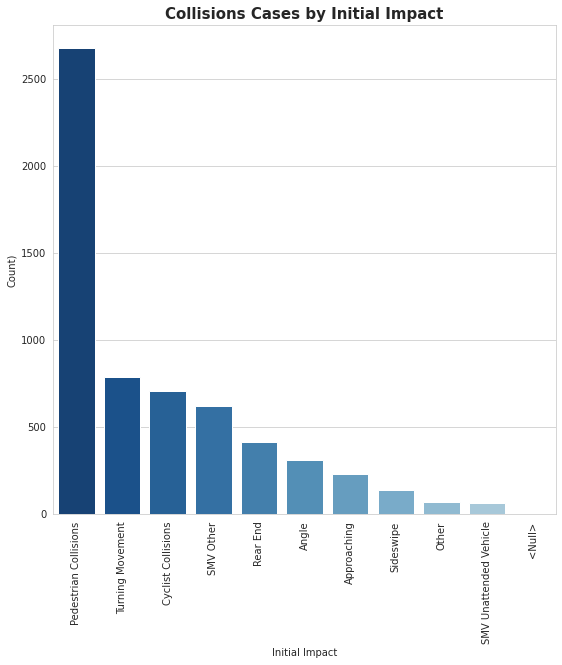

In [37]:
fig, ax=plt.subplots(figsize=(9,9))

sns.countplot(df1.IMPACTYPE, palette=sns.color_palette("Blues_r",15), order = df1['IMPACTYPE'].value_counts().index)
ax.set_title('Collisions Cases by Initial Impact', fontsize=15, fontweight='bold')
ax.set_xlabel('Initial Impact')
ax.set_ylabel('Count)')
sns.set_style("whitegrid")
plt.xticks(rotation = 90)

Pedistrian being number one who affected in collisions cases.

###Exploring Cases by INVTYPE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


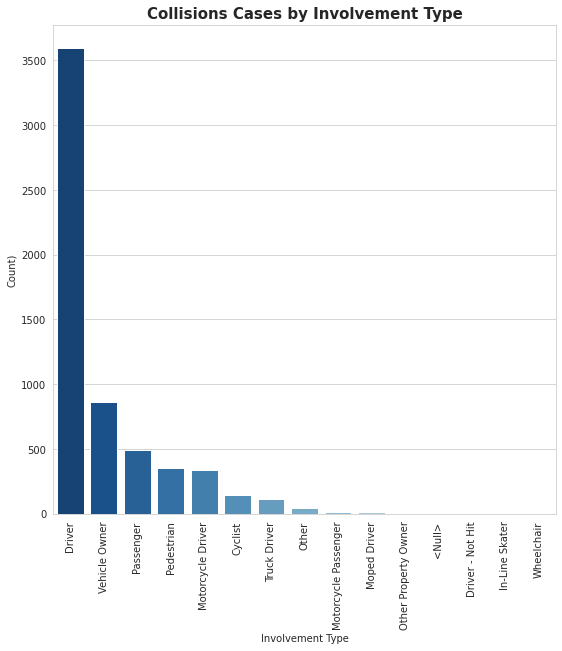

In [38]:
fig, ax=plt.subplots(figsize=(9,9))

sns.countplot(df1.INVTYPE, palette=sns.color_palette("Blues_r",15), order = df1['INVTYPE'].value_counts().index)
ax.set_title('Collisions Cases by Involvement Type', fontsize=15, fontweight='bold')
plt.xticks(rotation = 90)
ax.set_xlabel('Involvement Type')
ax.set_ylabel('Count)')
sns.set_style("whitegrid")

Driver are the most type person who involve in collision cases 

### Exploring Cases by NEIGHBOURHOOD

In [39]:
#Function for facilitate visualization process
def grouping(item, df=df1):
  new_df = df.groupby(by=item)['ACCNUM'].agg(['count'])
  new_df['Percentage'] = new_df['count']*100/df[df.columns[0]].count()
  new_df = new_df.rename(columns={'count':'Case'})
  new_df = new_df.sort_values('Case', ascending=False).reset_index()
  new_df['Cum_Percent'] = (new_df['Case'].cumsum() / new_df['Case'].sum()) * 100
  return new_df

In [40]:
hood1 = grouping('NEIGHBOURHOOD', df=df1)

In [41]:
hood1

,NEIGHBOURHOOD,Case,Percentage,Cum_Percent
0,Waterfront Communities-The Island (77),222,3.698767,3.698767
1,West Humber-Clairville (1),170,2.832389,6.531156
2,Bay Street Corridor (76),141,2.349217,8.880373
3,Rouge (131),132,2.199267,11.079640
4,Woburn (137),120,1.999334,13.078974
...,...,...,...,...
135,Guildwood (140),10,0.166611,99.483505
136,Lawrence Park North (105),10,0.166611,99.650117
137,Playter Estates-Danforth (67),10,0.166611,99.816728
138,Maple Leaf (29),7,0.116628,99.933356


In [42]:
hood1[hood1['Cum_Percent'] < 80]

,NEIGHBOURHOOD,Case,Percentage,Cum_Percent
0,Waterfront Communities-The Island (77),222,3.698767,3.698767
1,West Humber-Clairville (1),170,2.832389,6.531156
2,Bay Street Corridor (76),141,2.349217,8.880373
3,Rouge (131),132,2.199267,11.079640
4,Woburn (137),120,1.999334,13.078974
...,...,...,...,...
73,Kingsview Village-The Westway (6),31,0.516495,77.724092
74,Black Creek (24),31,0.516495,78.240586
75,Humber Heights-Westmount (8),30,0.499833,78.740420
76,Hillcrest Village (48),30,0.499833,79.240253


Founded that 78 neighborhood have 80% collicion case from 140 total neighbourhood.

**Which neighborhoods are classified as “Top 10”?**

Text(0, 0.5, 'Count)')

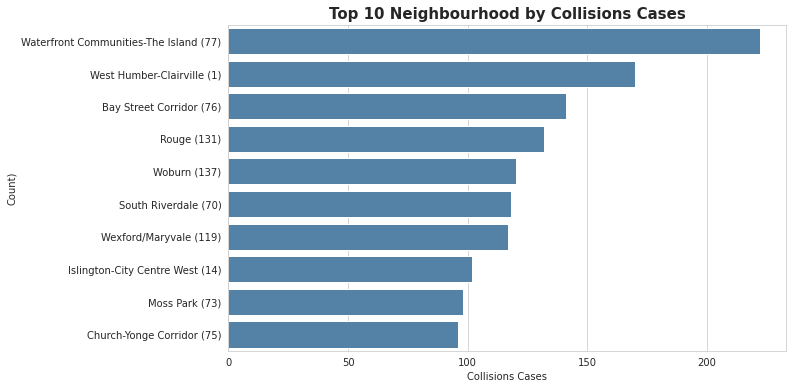

In [43]:
top10hood = hood1.head(10)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=top10hood, y='NEIGHBOURHOOD', x='Case', color='steelblue')
ax.set_title('Top 10 Neighbourhood by Collisions Cases', fontsize=15, fontweight='bold')
sns.set_style("whitegrid")
ax.set_xlabel('Collisions Cases')
ax.set_ylabel('Count)')

## K- Means Clustering

We only consider `NEIGHBORHOOD` feature and `ROAD_CLASS` feature to determine k cluster

In [44]:
cluster = pd.pivot_table(data=df1, index='NEIGHBOURHOOD', columns=['ROAD_CLASS'], aggfunc={'ROAD_CLASS' : 'count'}, fill_value=0 )
cluster.columns = ['Collector', 'Local', 'Major Arterial', 'Minor Arterial', 'Other']
cluster['Case'] = cluster.sum(axis=1)
cluster = cluster.reset_index()
cluster.head()

,NEIGHBOURHOOD,Collector,Local,Major Arterial,Minor Arterial,Other,Case
0,Agincourt North (129),8,2,53,1,0,64
1,Agincourt South-Malvern West (128),2,4,48,6,0,60
2,Alderwood (20),0,3,15,4,1,23
3,Annex (95),2,1,64,11,1,79
4,Banbury-Don Mills (42),3,0,46,4,2,55


In [45]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NEIGHBOURHOOD   140 non-null    object
 1   Collector       140 non-null    int64 
 2   Local           140 non-null    int64 
 3   Major Arterial  140 non-null    int64 
 4   Minor Arterial  140 non-null    int64 
 5   Other           140 non-null    int64 
 6   Case            140 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 7.8+ KB


### Standardization

In [46]:
scaler = StandardScaler()
scaler.fit(cluster[['Collector']])

cluster['Standardized_Collector'] = scaler.transform(cluster[['Collector']])

In [47]:
scaler = StandardScaler()
scaler.fit(cluster[['Local']])

cluster['Standardized_Local'] = scaler.transform(cluster[['Local']])

In [48]:
scaler = StandardScaler()
scaler.fit(cluster[['Major Arterial']])

cluster['Standardized_Major_Arterial'] = scaler.transform(cluster[['Major Arterial']])

In [49]:
scaler = StandardScaler()
scaler.fit(cluster[['Minor Arterial']])

cluster['Standardized_Minor_Arterial'] = scaler.transform(cluster[['Minor Arterial']])

In [50]:
scaler = StandardScaler()
scaler.fit(cluster[['Other']])

cluster['Standardized_Other'] = scaler.transform(cluster[['Other']])

In [51]:
cluster.head()

,NEIGHBOURHOOD,Collector,Local,Major Arterial,Minor Arterial,Other,Case,Standardized_Collector,Standardized_Local,Standardized_Major_Arterial,Standardized_Minor_Arterial,Standardized_Other
0,Agincourt North (129),8,2,53,1,0,64,1.734920,-0.094768,0.878062,-0.653606,-0.324941
1,Agincourt South-Malvern West (128),2,4,48,6,0,60,-0.205603,0.888015,0.680681,-0.110228,-0.324941
2,Alderwood (20),0,3,15,4,1,23,-0.852444,0.396623,-0.622031,-0.327579,0.872209
3,Annex (95),2,1,64,11,1,79,-0.205603,-0.586160,1.312299,0.433150,0.872209
4,Banbury-Don Mills (42),3,0,46,4,2,55,0.117817,-1.077551,0.601729,-0.327579,2.069359


In [52]:
X = cluster[['Standardized_Collector', 'Standardized_Local', 'Standardized_Major_Arterial', 'Standardized_Minor_Arterial', 'Standardized_Other']]

In [53]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=45)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

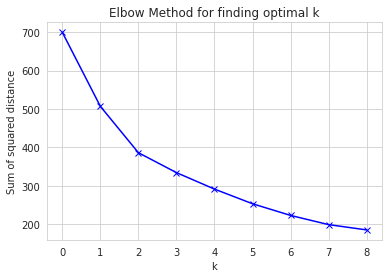

In [54]:
plt.plot(inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for finding optimal k')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=4, random_state=45)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=45)

In [70]:
kmeans.labels_

array([1, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 0, 3, 1, 3, 1, 1, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 0, 3, 3, 3, 1,
       0, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 2, 1, 0, 3, 1, 1, 1, 3, 3, 1,
       0, 3, 3, 3, 3, 3, 1, 3], dtype=int32)

In [71]:
cluster['Cluster'] = kmeans.labels_

In [72]:
df_cluster = cluster[['NEIGHBOURHOOD', 'Collector', 'Local', 'Major Arterial', 'Minor Arterial', 'Other', 'Case', 'Cluster']]
df_cluster.head()

,NEIGHBOURHOOD,Collector,Local,Major Arterial,Minor Arterial,Other,Case,Cluster
0,Agincourt North (129),8,2,53,1,0,64,1
1,Agincourt South-Malvern West (128),2,4,48,6,0,60,1
2,Alderwood (20),0,3,15,4,1,23,3
3,Annex (95),2,1,64,11,1,79,1
4,Banbury-Don Mills (42),3,0,46,4,2,55,3


Check clustering by total case

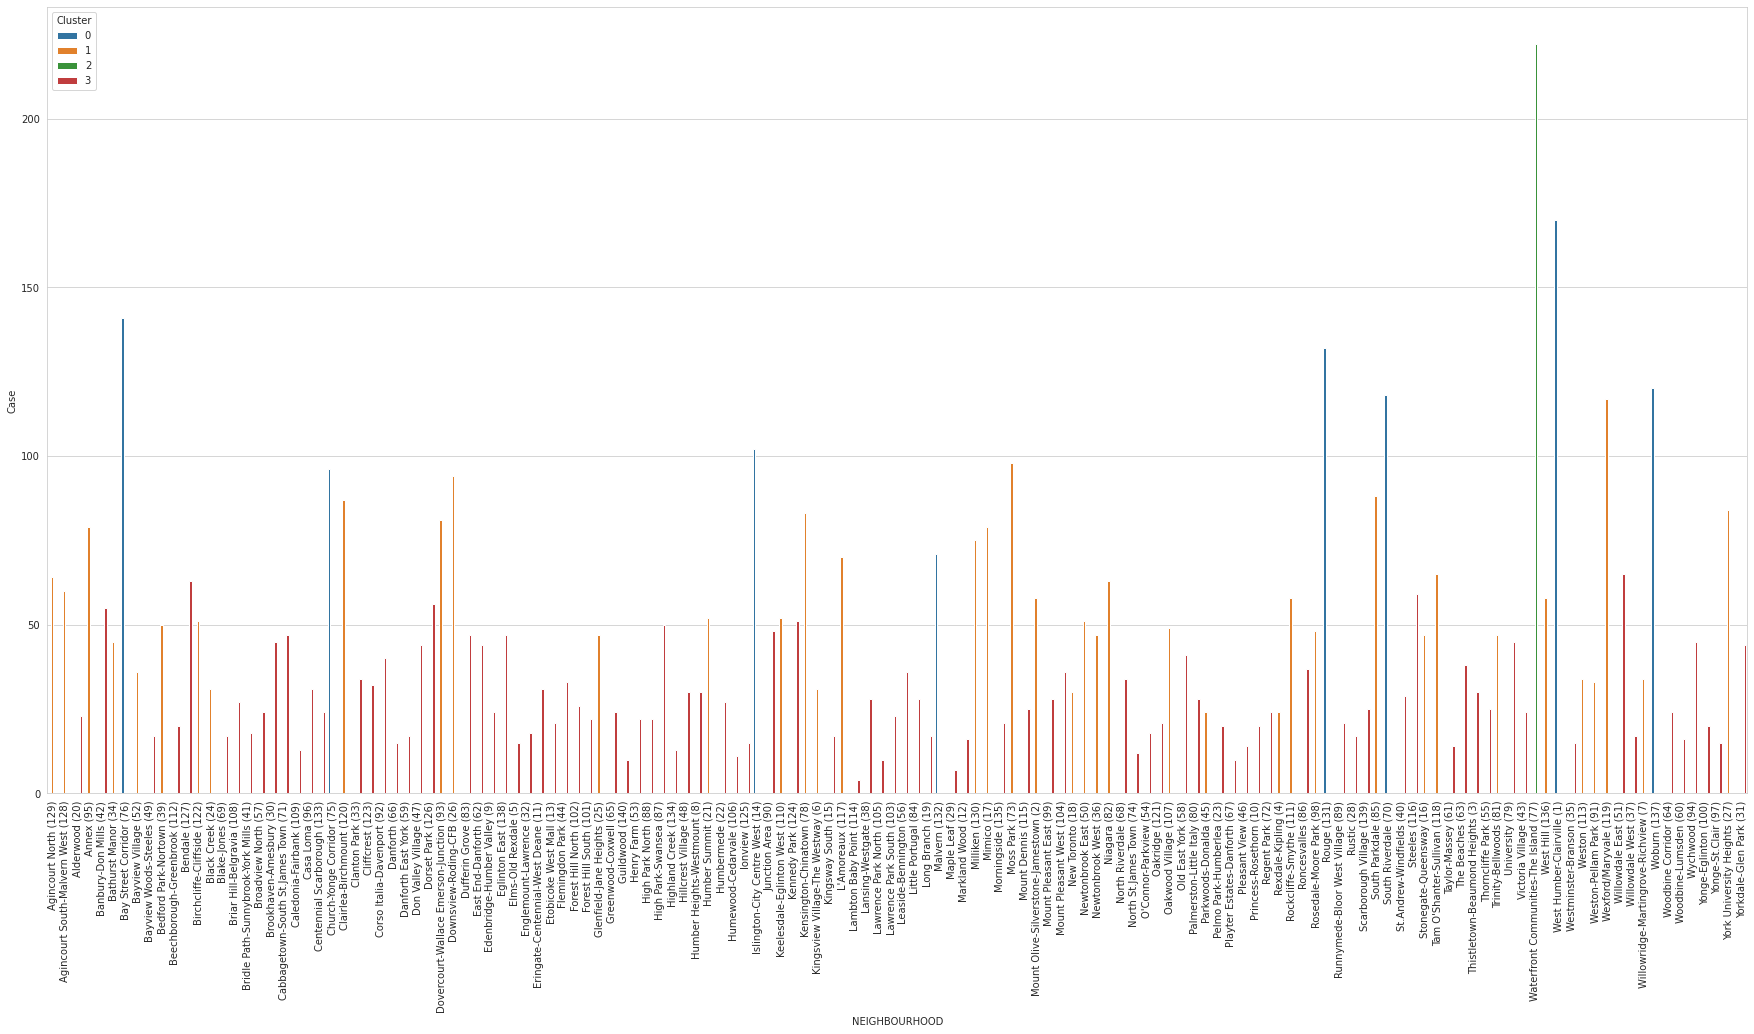

In [73]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.barplot(data=cluster, x='NEIGHBOURHOOD', y='Case', hue='Cluster')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout(pad=3.0)

In [76]:
segmented = cluster[['Collector', 'Local', 'Major Arterial', 'Minor Arterial', 'Other', 'Cluster', 'Case']]
segmented.groupby(['Cluster'])[['Collector', 'Local', 'Major Arterial', 'Minor Arterial', 'Other', 'Case']].median()

,Collector,Local,Major Arterial,Minor Arterial,Other,Case
Cluster,,,,,,
0,8.5,3.0,72.0,17.5,0.5,119.0
1,3.0,4.0,40.0,6.0,0.0,52.0
2,9.0,4.0,149.0,52.0,8.0,222.0
3,1.0,1.0,17.0,3.0,0.0,24.0


In [61]:
# Initialise TSNE
model = TSNE(random_state=1)
transformed = model.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


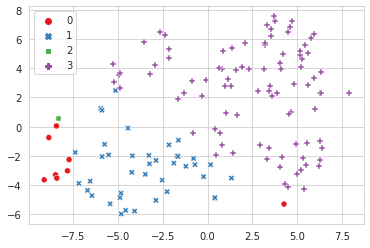

In [77]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=kmeans.labels_, style=kmeans.labels_, palette="Set1")

Based on the graph, we can conclude that:
*   Cluster 2 is the highest cluster based on accident cases but only has a the lowest neighborhoods in count
*   Cluster 0 is the second cluster based on accident cases and has more population than cluster 2
*   Cluster 1 has more population than cluster 2 and cluster 0 and has more accident cases than cluster 3
*   Cluster 3 is the lowest cluster based on accident cases but has the highest population

### Evaluation Model
Davies Bouldin Score is a metric for evaluating clustering algorithms. The smaller Davies Bouldin Score is The more optimal the cluster.

CLUSTERING = 2

In [63]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [64]:
print(davies_bouldin_score(X, kmeans.labels_))

1.336334407813786


CLUSTERING = 3

In [65]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [66]:
print(davies_bouldin_score(X, kmeans.labels_))

1.2523476811008407


CLUSTERING = 4

In [67]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [68]:
print(davies_bouldin_score(X, kmeans.labels_))

1.1456564455678686


K-Means 2 clusters has lowest davies bouldin score than other cluster. Therefore the optimum cluster is 4.

#Conclusion

*   Cluster 2 is the neighborhood cluster that has the highest accident cases, so it is necessary to focus more on reducing cases in this area. 
*   The majority of collisions occur in the Major Artery which is the main road in Toronto.
*   Toronto and East York are the districts with the highest number of collisions than any other district. So it is necessary to pay attention in this area too.
*   The environment is not a significant factor that contributes to collision cases. Most crash cases occur on dry roads, in daylight and in clear visibility.
*   Traffic signs are not enough to reduce collision cases because the dataset says there are even traffic signs or not, still many collision cases.

#Recomendation

*   This project will be more complete if most Null values ​​can be filled with correct data. In this study, we can only look at the factors and areas where many accidents occur, but not the factors why accidents can occur because of the large number of Null values ​​in the dataset.